## Python Practice
A recreation of [Randal S. Olson's An Example Machine Learning Notebook](http://nbviewer.jupyter.org/github/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb)

In [10]:
#import .csv, check data set
import pandas as pd

iris_data = pd.read_csv('/Users/sanemkabaca/Documents/Personal/Training/Python/iPython Practice/iris-data.csv')
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#treat anything with NA as a missing value
iris_data = pd.read_csv('iris-data.csv', na_values = ['NA'])

In [5]:
#print some summary statistics
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#set up notebook to show plots
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

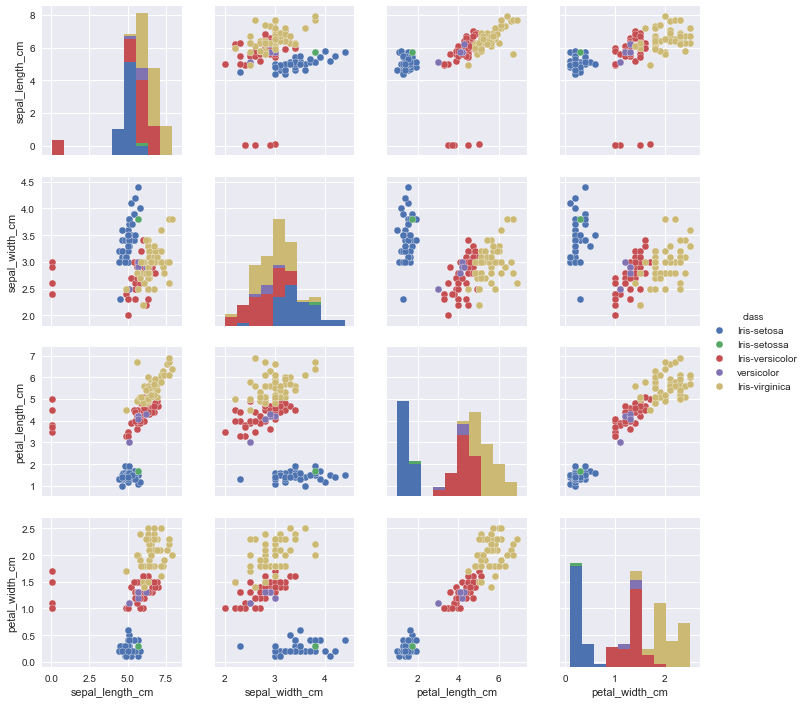

In [7]:
#scatterplot matrix to plot distribution of each column along
#diagonal and scatterplot matrix for each combo of variables
#also drop na's
sb.pairplot(iris_data.dropna(), hue='class')

In [12]:
##Flower class coding error; recode into appropriate class
##loc looks at the labels -- so in this dataframe, fix where the label for class is 'versicolor' in column 'class'
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

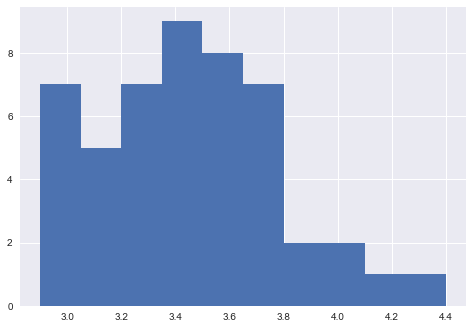

In [13]:
##Outliers
#Recreate df which only keeps iris-setosa rows with a sepal width more than 2.5cm
#Plot a histogram of IS and sepal width
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

In [14]:
##see what's going on with the 5 entries where the sepal length is nearly 0cm
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
             (iris_data['sepal_length_cm'] < 1.0)]

##plot twist: sepal length was accidentally measured in meters -- need to multiply by 100

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


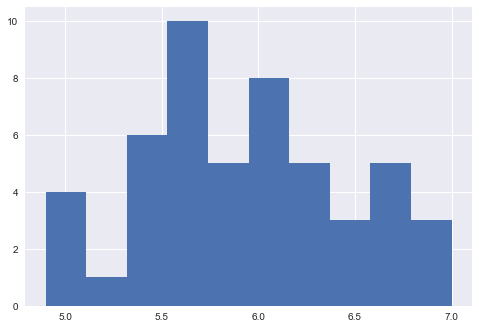

In [19]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
             (iris_data['sepal_length_cm'] < 1.0),
             'sepal_length_cm'] *= 100.0

iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()